# Bank Churn Modeling 

1. Import data and python packages 
2. Assess Data Quality and Missing Values 
3. Exploratory Data Analysis
4. Neural Networks


### 1. Import data and python packages 

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score 
from sklearn.metrics import auc 

df=pd.read_csv('Churn Modeling.csv')



### 2. Assess Data Quality and Missing Values

In [48]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [49]:
df.shape
df.drop_duplicates(inplace=True)
df.shape

(10000, 14)

In [50]:
df 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 3. Exploratory Analysis


<AxesSubplot:>

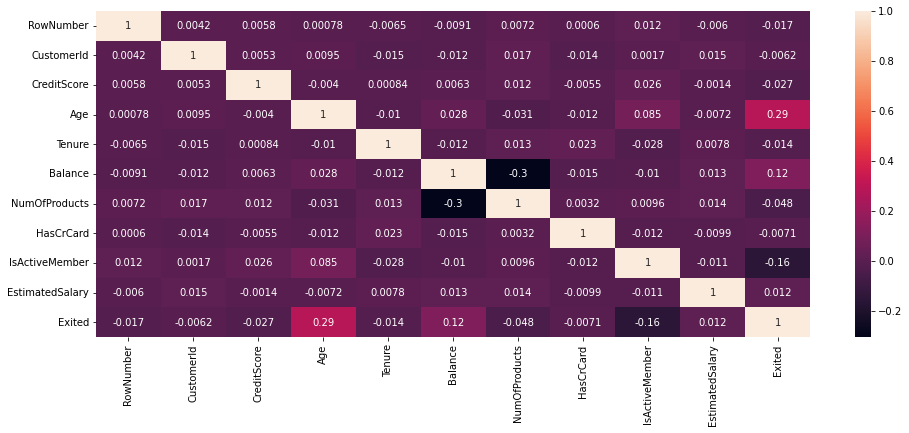

In [51]:
plt.figure(figsize=(16, 6))

ax=sns.heatmap(df.corr(),annot=True)
ax

###### The majority of the correlations are low. The highest correlations with exited are 'age' and 'balance'

RowNumber          5014
CustomerId         5014
Surname            5014
CreditScore        5014
Geography          5014
Gender             5014
Age                5014
Tenure             5014
Balance            5014
NumOfProducts      5014
HasCrCard          5014
IsActiveMember     5014
EstimatedSalary    5014
Exited             5014
dtype: int64

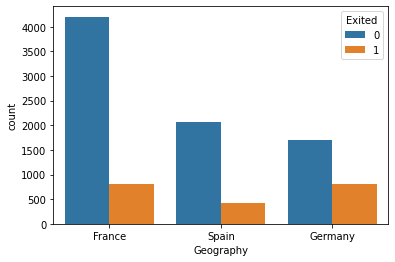

In [52]:
import plotly.express as px 
sns.countplot(data=df,x='Geography', hue='Exited')

df.loc[df['Geography']=='France'].count()



In [53]:
fr=df.loc[df['Geography']=='France']
len(fr)
print('There is a total of',len(fr),'customers in France')
len(fr.loc[df['Exited']==1])
print('Precentage of French customers who exited is %.2f%%'%int(len(fr.loc[df['Exited']==1])/len(fr)*100))
len(fr.loc[df['Exited']==0])
print('Percentage of French customers who stayed is %.2f%%'%int(len(fr.loc[df['Exited']==0])/len(fr)*100))

There is a total of 5014 customers in France
Precentage of French customers who exited is 16.00%
Percentage of French customers who stayed is 83.00%


<AxesSubplot:xlabel='Gender', ylabel='count'>

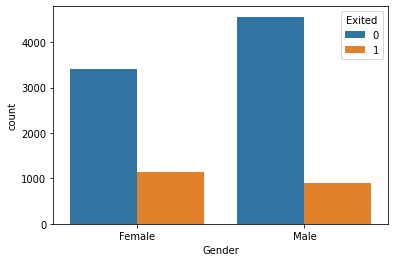

In [54]:
sns.countplot(data=df,x='Gender',hue='Exited')

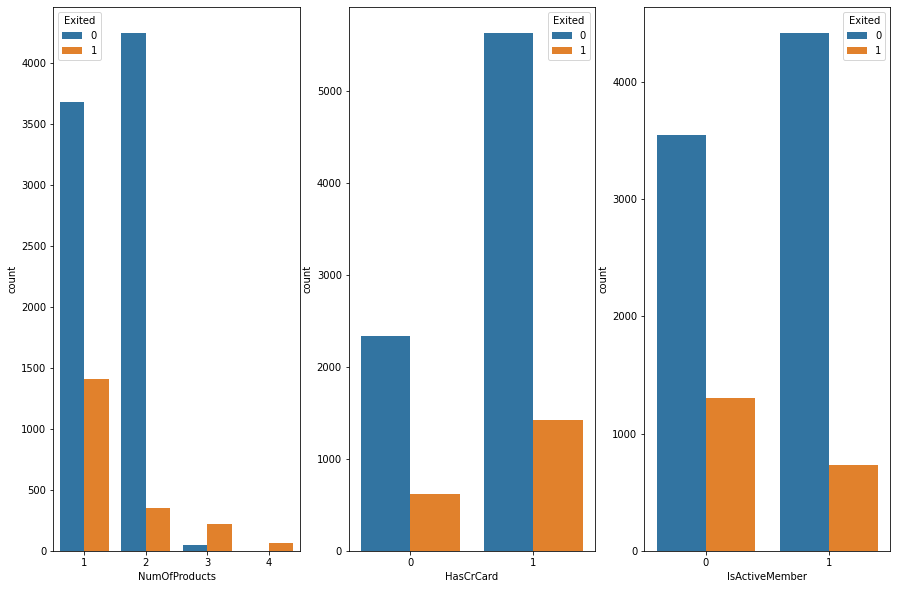

In [55]:
plt.subplots(1,3,figsize=(15,10))
cols=df.columns[9:12].tolist()

for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    ax=sns.countplot(data=df,x=cols[i],hue='Exited')


In [56]:
#Percentage of exiting whether one has credit card or not 
yescard=df.loc[df['HasCrCard']==1]
bye1=yescard.loc[df['Exited']==1]
nocard=df.loc[df['HasCrCard']==0]
bye2=nocard.loc[df['Exited']==1]

print('Percentage of People who have a credit card and who exited is %.2f%%'%int(len(bye1)/len(yescard)*100))
print('Percentage of People who do not have a credit card and who exited is %.2f%%'%int(len(bye2)/len(nocard)*100))

#Percentage of exiting whether one is an active member or not 
active=df.loc[df['IsActiveMember']==1]
byeact=active.loc[df['Exited']==1]
noactive=df.loc[df['IsActiveMember']==0]
byenoactive=noactive.loc[df['Exited']==1]
print('Percentage of People who are active member and who exited is %.2f%%'%int(len(byeact)/len(active)*100))
print('Percentage of People who are not an active and who exited is %.2f%%'%int(len(byenoactive)/len(noactive)*100))


Percentage of People who have a credit card and who exited is 20.00%
Percentage of People who do not have a credit card and who exited is 20.00%
Percentage of People who are active member and who exited is 14.00%
Percentage of People who are not an active and who exited is 26.00%


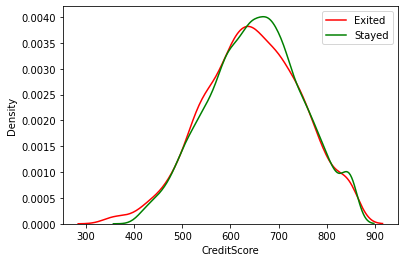

In [57]:
#Credit Score
sns.kdeplot(df['CreditScore'][df.Exited==1],color='red')
sns.kdeplot(df['CreditScore'][df.Exited==0], color='green')
plt.legend(['Exited','Stayed'])

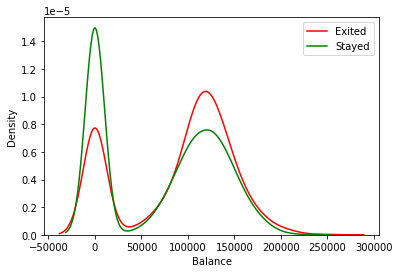

In [58]:
#Balance
sns.kdeplot(df['Balance'][df.Exited==1],color='red')
sns.kdeplot(df['Balance'][df.Exited==0],color='green')
plt.legend(['Exited','Stayed'])

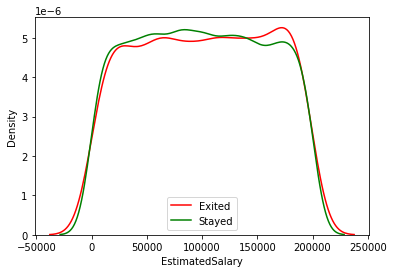

In [59]:
sns.kdeplot(df['EstimatedSalary'][df.Exited==1],color='red')
sns.kdeplot(df['EstimatedSalary'][df.Exited==0],color='green')
plt.legend(['Exited','Stayed'])

###### There seems to be a negative correlation between the balance and customers staying in the bank. The more a customer has money in that bank the more likely they will exit the bank

In [60]:
print(len(df.loc[df['Exited']==1]))
print(len(df.loc[df['Exited']==0]))

2037
7963


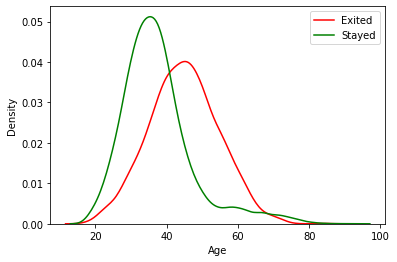

In [61]:
#Age 
sns.kdeplot(df['Age'][df.Exited==1],color='red')
sns.kdeplot(df['Age'][df.Exited==0], color='green')
plt.legend(['Exited','Stayed'])

###### There seems to be a positive correlation between the age of customers and them exiting the bank

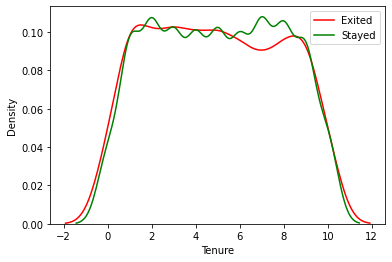

In [62]:
#Tenure 
sns.kdeplot(df['Tenure'][df.Exited==1], color='red')
sns.kdeplot(df['Tenure'][df.Exited==0], color='green')
plt.legend(['Exited','Stayed'])

### 4. Neural Networks

In [63]:
from sklearn.preprocessing import LabelEncoder
col=df.columns.tolist()
encoder=LabelEncoder()
da=pd.DataFrame()

for i in range(len(col)):
    da[df.columns.to_list()[i]]=encoder.fit_transform(df.iloc[:,i])
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   RowNumber        10000 non-null  int64
 1   CustomerId       10000 non-null  int64
 2   Surname          10000 non-null  int32
 3   CreditScore      10000 non-null  int64
 4   Geography        10000 non-null  int32
 5   Gender           10000 non-null  int32
 6   Age              10000 non-null  int64
 7   Tenure           10000 non-null  int64
 8   Balance          10000 non-null  int64
 9   NumOfProducts    10000 non-null  int64
 10  HasCrCard        10000 non-null  int64
 11  IsActiveMember   10000 non-null  int64
 12  EstimatedSalary  10000 non-null  int64
 13  Exited           10000 non-null  int64
dtypes: int32(3), int64(11)
memory usage: 976.7 KB


In [74]:
from sklearn.model_selection import train_test_split

X = da.iloc[:,[3,5,6,7, 8,9,10,11,12]].values #Variables that showed some correlation
y=da.Exited.values

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=0)

In [75]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [76]:
import tensorflow
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow import keras 
from keras.layers import Dense 
import warnings 



In [78]:
seq=Sequential()

#Adding input layer and the first hidden layer 
seq.add(Dense(11,  activation='relu', input_dim=11,input_shape=(None,9)))

#Adding the second hidden layer 
seq.add(Dense(11, activation= 'sigmoid'))

#Adding the output layer 
seq.add(Dense(1, activation='sigmoid'))

#Compiling the ANN
seq.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [79]:
seq.fit(X_train, y_train, epochs=100)



Epoch 1/100
235/235 [==============================] - 1s 2ms/step - loss: 0.5015 - accuracy: 0.7963
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7963
Epoch 3/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.7984
Epoch 4/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.8109
Epoch 5/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8252
Epoch 6/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8317
Epoch 7/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.8379
Epoch 8/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8403
Epoch 9/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.8473
Epoch 10/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3748 - accura

In [81]:
y_pred=seq.predict(X_test)
score=accuracy_score(y_test,y_pred.round())
score

79/79 [==============================] - 0s 1ms/step


0.858

In [82]:
val_loss, val_acc=seq.evaluate(X_test,y_test) #See if there is overfitting
print(val_loss, val_acc)

79/79 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8580
0.3472442924976349 0.8579999804496765
